In [1]:
import os
import time


import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display as display

In [2]:
data_path = 'dataset'


df = pd.read_csv(os.path.join(data_path, 'data.csv'))

y_cols = [c for c in df.columns if c != 'image']

df['normal'] = False
df.loc[np.all(df[y_cols] == 0, axis=1), 'normal'] = True
display.display(df)
display.display(df[y_cols].sum())

,image,Lt. Condyle,Rt. Condyle,Lt. Ramus-Angle,Rt. Ramus-Angle,Lt. Body,Rt. Body,Lt. Coronoid,Rt. Coronoid,Symphysis-Parasymphysis,normal
0,OPG Film Set 1/case1.jpg,0,0,0,0,0,0,0,0,0,True
1,OPG Film Set 1/case2.jpg,0,0,0,0,0,0,0,0,0,True
2,OPG Film Set 1/case3.jpg,0,0,0,0,0,0,0,0,0,True
3,OPG Film Set 1/case4.jpg,0,0,0,0,0,0,0,0,0,True
4,OPG Film Set 1/case5.jpg,0,0,0,0,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...
145,OPG Film Set 4/308443.jpg,0,0,0,0,0,0,0,0,1,False
146,OPG Film Set 4/446485.jpg,0,0,0,0,0,0,0,0,0,True
147,OPG Film Set 4/2052089.jpg,0,0,0,0,0,0,0,0,1,False
148,OPG Film Set 4/1397115.jpg,0,1,0,0,0,0,0,0,0,False


Lt. Condyle                18
Rt. Condyle                21
Lt. Ramus-Angle            14
Rt. Ramus-Angle             6
Lt. Body                    3
Rt. Body                    5
Lt. Coronoid                0
Rt. Coronoid                2
Symphysis-Parasymphysis    52
dtype: int64

In [3]:
train_df, valid_df = train_test_split(df, test_size=0.2, stratify=df['normal'])

In [94]:
from tensorflow.keras.applications.vgg16 import preprocess_input

augment_datagen = ImageDataGenerator(
    rotation_range=2,
    width_shift_range=.05,
    height_shift_range=.05,
    zoom_range=0.05,)
#     preprocessing_function=preprocess_input)
datagen = ImageDataGenerator()
#     preprocessing_function=preprocess_input)

In [95]:
train_generator = augment_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image',
    y_col=y_cols,
    directory=data_path, 
    class_mode='raw',
    shuffle=True,
    batch_size=1,)
#     target_size=(224, 224))
valid_generator = datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='image',
    y_col=y_cols,
    directory=data_path,
    class_mode='raw',
    batch_size=1,)
#     target_size=(224, 224))

Found 120 validated image filenames.
Found 30 validated image filenames.


In [110]:
def fliping_gen(image_generator, flip_p=0.5):
    for x, y in image_generator:
        f = np.random.binomial(1, flip_p, size=x.shape[0]) == 1
        # B, H, W, C
        x[f, :, :, :] = x[f, :, ::-1, :]
        for i in range(0, 7, 2):
            y[f, i], y[f, i + 1] = y[f, i + 1], y[f, i]
        yield x, y

[[0 0 0 0 0 0 0 0 0]]


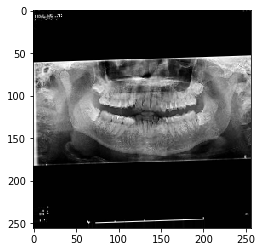

In [114]:
image, label = next(iter(fliping_gen(train_generator)))
plt.imshow(image[0].astype(np.uint8))
print(label)